<a href="https://colab.research.google.com/github/Shilajit-CR7/ML-Works/blob/main/KNN(Iris).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
pip install mplcyberpunk

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplcyberpunk
import seaborn as sns

In [86]:
plt.style.use("cyberpunk")

In [10]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
df = df.drop('Id',axis = 'columns')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [14]:
dfle = df
dfle.head(n=2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [15]:
dfle['Species'] = le.fit_transform(dfle['Species'])

In [19]:
dfle.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [78]:
df0 = df[df['Species']==0]
df1 = df[df['Species']==1]
df2 = df[df['Species']==2]

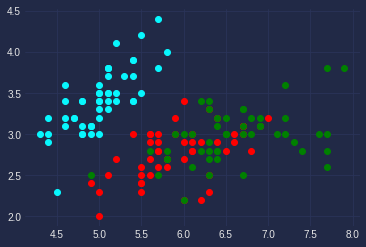

In [87]:
plt.scatter(df0['SepalLengthCm'],df0['SepalWidthCm'])
plt.scatter(df1['SepalLengthCm'],df1['SepalWidthCm'],color='red')
plt.scatter(df2['SepalLengthCm'],df2['SepalWidthCm'],color='green')

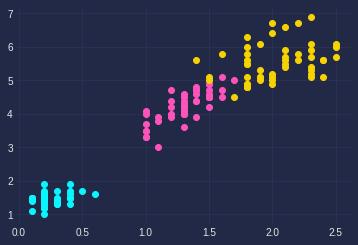

In [90]:
plt.scatter(df0['PetalWidthCm'],df0['PetalLengthCm'])
plt.scatter(df1['PetalWidthCm'],df1['PetalLengthCm'])
plt.scatter(df2['PetalWidthCm'],df2['PetalLengthCm'])

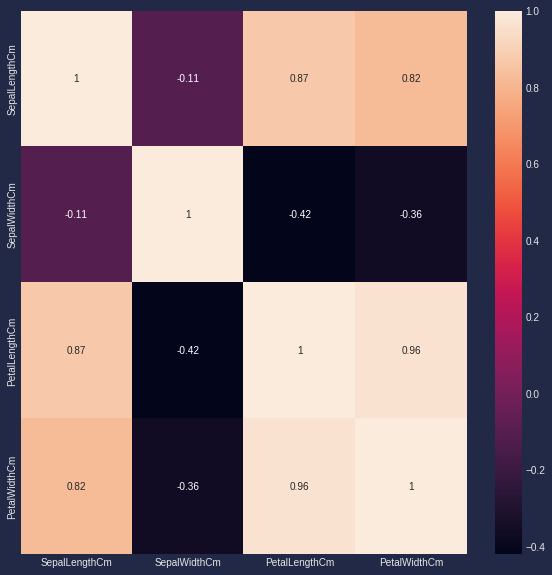

In [98]:
plt.figure(figsize=(10,10))
corr_matrix = df.drop('Species',axis='columns').corr()
sns.heatmap(corr_matrix,annot=True)

In [21]:
x = df.drop('Species',axis = 'columns')
y = df['Species']

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [27]:
knn.fit(x,y)

KNeighborsClassifier(n_neighbors=3)

In [32]:
knn.predict([[7,8,9,10]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([2])

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.2,random_state = 1)

In [58]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [59]:
knn.score(X_train,Y_train)

0.95

In [60]:
y_pred = knn.predict(X_test)

In [62]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

In [63]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [70]:
y_pred = knn.predict(X_test)
y_pred =pd.DataFrame(y_pred)

In [72]:
y_pred.columns = ['Predicted']

In [73]:
Y_test = pd.DataFrame(Y_test)

In [74]:
Y_test.columns = ['Actual']

In [75]:
Y_test.insert(1,'Predicted',y_pred)

In [76]:
Y_test

,Actual,Predicted
14,0,0
98,1,1
75,1,1
16,0,0
131,2,2
56,1,1
141,2,2
44,0,0
29,0,0
120,2,2
